In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import ifft, fft, fftfreq, fftshift, ifft2, fft2
from scipy.io import wavfile
from scipy.io import loadmat
from audio_function import plot1, plot1_f, mean_data_sep,  corr_t, corr_f, cr_arr_t, norm_max, load_mat, first_second_part, filt_freq, t_arr_for_corr_t

Данные загружены


In [28]:
# Загружаем .mat файл
data_46 = loadmat('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/2025.04.22/Mic DUT/Mic (DUT)_46.mat')
data_47 = loadmat('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/2025.04.22/Mic DUT/Mic (DUT)_47.mat')
data_48 = loadmat('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/2025.04.22/Mic DUT/Mic (DUT)_48.mat')
data_49 = loadmat('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/2025.04.22/Mic DUT/Mic (DUT)_49.mat')
data_50 = loadmat('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/2025.04.22/Mic DUT/Mic (DUT)_50.mat')
data_51 = loadmat('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/2025.04.22/Mic DUT/Mic (DUT)_51.mat')
data_52 = loadmat('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/2025.04.22/Mic DUT/Mic (DUT)_52.mat')
data_53 = loadmat('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/2025.04.22/Mic DUT/Mic (DUT)_53.mat')
data_54 = loadmat('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/2025.04.22/Mic DUT/Mic (DUT)_54.mat')
data_55 = loadmat('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/2025.04.22/Mic DUT/Mic (DUT)_55.mat')
data_56 = loadmat('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/2025.04.22/Mic DUT/Mic (DUT)_56.mat')
data_57 = loadmat('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/2025.04.22/Mic DUT/Mic (DUT)_57.mat')
data_58 = loadmat('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/2025.04.22/Mic DUT/Mic (DUT)_58.mat')

data = np.array([data_46, data_47, data_48, data_49, data_50, data_51, data_52, data_53, data_54, data_55, data_56, data_57, data_58])
print(data[0].keys())

dict_keys(['__header__', '__version__', '__globals__', 'File_name', 'Start_time', 'Number_of_channels', 'Sample_rate', 'Store_type', 'Data1_Mic__DUT__Header', 'Data1_Mic__DUT', 'Data1_time_Mic__DUT', 'Events', 'Start_trigger_times'])


In [34]:
# Загружаем .mat файл
data_46 = loadmat('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/2025.04.22/Mic ref/Mic (ref)_46.mat')
data_47 = loadmat('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/2025.04.22/Mic ref/Mic (ref)_47.mat')
data_48 = loadmat('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/2025.04.22/Mic ref/Mic (ref)_48.mat')
data_49 = loadmat('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/2025.04.22/Mic ref/Mic (ref)_49.mat')
data_50 = loadmat('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/2025.04.22/Mic ref/Mic (ref)_50.mat')
data_51 = loadmat('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/2025.04.22/Mic ref/Mic (ref)_51.mat')
data_52 = loadmat('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/2025.04.22/Mic ref/Mic (ref)_52.mat')
data_53 = loadmat('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/2025.04.22/Mic ref/Mic (ref)_53.mat')
data_54 = loadmat('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/2025.04.22/Mic ref/Mic (ref)_54.mat')
data_55 = loadmat('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/2025.04.22/Mic ref/Mic (ref)_55.mat')
data_56 = loadmat('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/2025.04.22/Mic ref/Mic (ref)_56.mat')
data_57 = loadmat('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/2025.04.22/Mic ref/Mic (ref)_57.mat')
data_58 = loadmat('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/2025.04.22/Mic ref/Mic (ref)_58.mat')

data = np.array([data_46, data_47, data_48, data_49, data_50, data_51, data_52, data_53, data_54, data_55, data_56, data_57, data_58])
print(data[0].keys())

dict_keys(['__header__', '__version__', '__globals__', 'File_name', 'Start_time', 'Number_of_channels', 'Sample_rate', 'Store_type', 'Data1_Mic__ref__Header', 'Data1_Mic__ref', 'Data1_time_Mic__ref', 'Events', 'Start_trigger_times'])


In [ ]:
print(data[0]['Data1_time_U_LS'].shape)

In [ ]:
list_of_reshaped_arrays = [item['Data1_Mic__DUT'].reshape((305676,)) for item in data]
t_arrays = [item['Data1_time_Mic__DUT'].reshape((305676,)) for item in data]

#list_of_reshaped_arrays = [item['Data1_Mic__ref'].reshape((305676,)) for item in data]
#t_arrays = [item['Data1_time_Mic__ref'].reshape((305676,)) for item in data]

signals_with_base = np.array(list_of_reshaped_arrays)
sample_rate = [item['Sample_rate'].reshape((1,)) for item in data]
t = np.array(t_arrays)

In [43]:
def band_amplitude(signal, f_low, f_high):
    filtered = filt_freq(fft(signal), f_low, f_high)
    energy = np.sum(np.abs(filtered) ** 2)  # Сумма квадратов модуля амплитуд
    N = len(filtered != 0)
    return energy / N

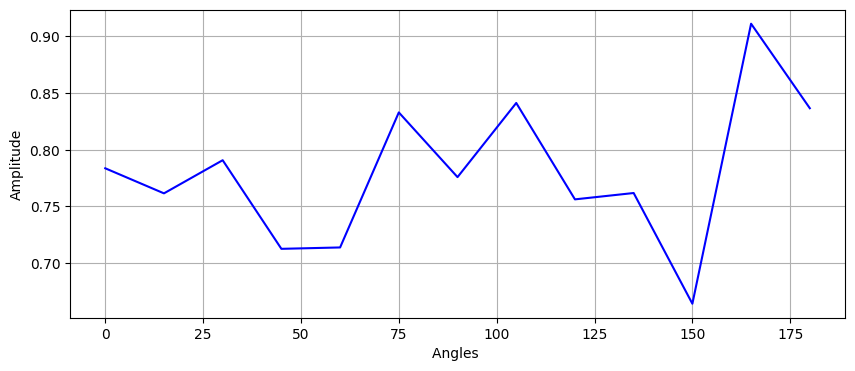

In [47]:
amplitudes = []
angles = []

for i in range (0, len(t)):
    t_index = (t[i] > 6) & (t[i] < 6.9)
    t_rotation = t[i][t_index]
    data_norm = signals_with_base[i][t_index]/max(signals_with_base[i][t_index])
    angles.append(15*i)
    amp = band_amplitude(data_norm, 470, 530)
    amplitudes.append(amp)



plt.figure(figsize=(10,4))
plt.plot(angles, amplitudes, color='blue')
plt.grid(True)
plt.xlabel('Angles ')
plt.ylabel('Amplitude')
plt.show()

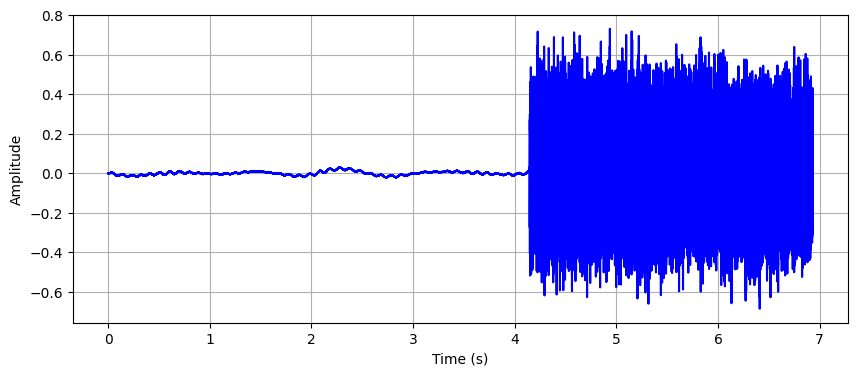

In [36]:
plt.figure(figsize=(10,4))
plt.plot(t[0], signals_with_base[0], color='blue')
plt.grid(True)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

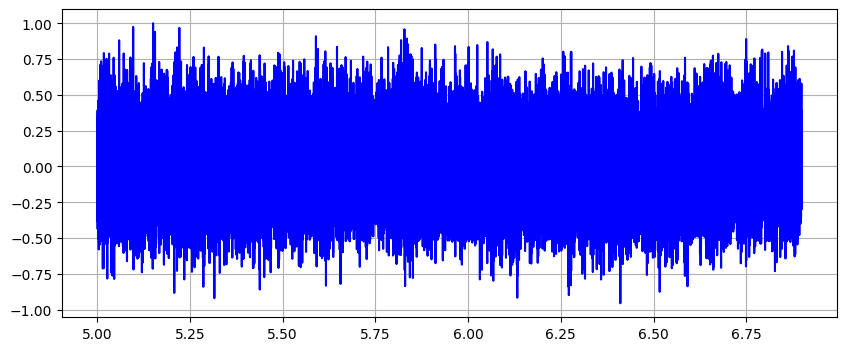

In [38]:

t_index = (t[0] > 5) & (t[0] < 6.9)
t_rotation = t[0][t_index]
data_norm = signals_with_base[0][t_index]/max(signals_with_base[0][t_index])

data_norm_f = fft(data_norm)
f_rotation = fftfreq(int(len(data_norm)), 1 / sample_rate[0])

plt.figure(figsize=(10,4))
plt.plot(t_rotation, (data_norm), color='blue')

plt.grid(True)

In [ ]:
print(sample_rate.shape)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_radiation_pattern(signal):
    angles = np.linspace(0, 2 * np.pi, len(signal))  # Углы в радианах
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.plot(angles, np.abs(signal), linewidth=2)
    #ax.fill(angles, np.abs(signal), alpha=0.3)  # Закраска под кривой
    ax.set_title("Диаграмма направленности датчика")
    plt.show()

# Пример данных: синтетический сигнал, моделирующий направленность
# num_points = 360
# example_signal = np.abs(np.cos(np.linspace(0, 2 * np.pi, num_points)))

plot_radiation_pattern(signal_achx)
